In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.rcParams['figure.max_open_warning'] = 0
import numpy as np
#import pandas as pd
df5 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only.txt", delimiter = '\t')#, nrows=2)


In [8]:
dfclean5 = df5.copy()
dfclean5['plates'] = dfclean5['plate'].str.extract(r'(\d+)').astype(int)
#keep this order because I went through the output file individually to determine these lines
dfclean5 = dfclean5[~dfclean5.index.isin(range(33482, 33797))] #122
dfclean5 = dfclean5[~dfclean5.index.isin(range(34747, 35652))] #126, 127, 128
dfclean5 = dfclean5[~dfclean5.index.isin(range(35930, 36501))] #130, 131
dfclean5 = dfclean5[~dfclean5.index.isin(range(36770, 37054))] #133
dfclean5 = dfclean5[~dfclean5.index.isin(range(38773, 39015))] #140
dfclean5 = dfclean5[~dfclean5.index.isin(range(39325, 39543))] #142
dfclean5 = dfclean5[~dfclean5.index.isin(range(40030, 40626))] #145, 146
dfclean5 = dfclean5[~dfclean5.index.isin(range(46853, 49718))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean5 = dfclean5[~(dfclean5.index >= 115849)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

In [9]:
Mclean5 = dfclean5.copy()

columns_to_check = ['C15', 'C25', 'D15', 'D25', 'R15', 'R25']


for column in columns_to_check:
    Mclean5[column] = Mclean5[column].apply(lambda x: x if x >= 200 else 0)
    
Mclean5 = Mclean5[~(Mclean5[columns_to_check] < 200).all(axis=1)]


In [15]:
adjusted5= Mclean5.copy()
numeric_columns = adjusted5.select_dtypes(include=[np.number]).columns

# Calculate z-scores and adjust outliers to the mean
numeric_columns = adjusted5.select_dtypes(include=[np.number]).columns

# Adjust outliers to the mean
for col in numeric_columns:
    mean = adjusted5[col].mean()
    std = adjusted5[col].std()
    z_scores = (adjusted5[col] - mean) / std
    
    # Replace outliers (threshold: 3 standard deviations from the mean) with the mean
    outlier_threshold = 20.0
    adjusted5[col] = np.where(np.abs(z_scores) > outlier_threshold, mean, adjusted5[col])
    adjusted5[col] =  adjusted5[col].astype(int)
#print(dfclean3_adjustedto_m)

In [16]:
Mclean5_scaled = adjusted5.copy()
columns_to_standardize = ['C15', 'C25', 'D15', 'D25', 'R15', 'R25']
Mclean5_scaled[columns_to_standardize] = scaler.fit_transform(Mclean5[columns_to_standardize])


In [39]:
Mclean5_scaled['ratio RR'] =Mclean5_scaled['R15']//Mclean5_scaled['R25']

Mclean5_scaled['ratio R1C1'] =Mclean5_scaled['R15']//Mclean5_scaled['C15']
Mclean5_scaled['ratio R1C2'] =Mclean5_scaled['R15']//Mclean5_scaled['C25']
Mclean5_scaled['ratio R2C1'] =Mclean5_scaled['R25']//Mclean5_scaled['C15']
Mclean5_scaled['ratio R2C2'] =Mclean5_scaled['R25']//Mclean5_scaled['C25']

Mclean5_scaled['ratio D1R1'] =Mclean5_scaled['D15']//Mclean5_scaled['R15']
Mclean5_scaled['ratio D1R2'] =Mclean5_scaled['D15']//Mclean5_scaled['R25']
Mclean5_scaled['ratio D2R1'] =Mclean5_scaled['D25']//Mclean5_scaled['R15']
Mclean5_scaled['ratio D2R2'] =Mclean5_scaled['D25']//Mclean5_scaled['R15']
Mclean5_scaled = Mclean5_scaled.replace([np.inf, -np.inf], 0).dropna()


martin wants: 

ratio of regular air to high co2 

+plot that against other replicate

+light vs dark

In [1]:
grouped5= {}


for pattern, group in Mclean5_scaled.groupby('plates'):
    grouped5[pattern] = group
for key, df in grouped5.items():
    x=df['ratio R1C1']
    y=df['ratio R2C2']
    plt.scatter(x,y)
    plt.xlabel('Ratio R1C1')
    plt.ylabel('Ratio R2C2')
    plt.title(f'Scatter Plot for Plate {key}')
    plt.show() 

NameError: name 'Mclean5_scaled' is not defined

In [2]:
grouped5= {}


for pattern, group in Mclean5_scaled.groupby('plates'):
    grouped5[pattern] = group
for key, df in grouped5.items():
    x=df['ratio R1C2']
    y=df['ratio R2C1']
    plt.scatter(x,y)
    plt.xlabel('Ratio R1C2')
    plt.ylabel('Ratio R2C1')
    plt.title(f'Scatter Plot for Plate {key}')
    plt.show() 

NameError: name 'Mclean5_scaled' is not defined

In [3]:
grouped5= {}


for pattern, group in Mclean5_scaled.groupby('plates'):
    grouped5[pattern] = group
for key, df in grouped5.items():
    x=df['ratio D1R1']
    y=df['ratio D2R2']
    plt.scatter(x,y)
    plt.xlabel('Ratio D1R1')
    plt.ylabel('Ratio D2R2')
    plt.title(f'Scatter Plot for Plate {key}')
    plt.show() 

NameError: name 'Mclean5_scaled' is not defined

In [4]:
grouped5= {}


for pattern, group in Mclean5_scaled.groupby('plates'):
    grouped5[pattern] = group
for key, df in grouped5.items():
    x=df['ratio D1R2']
    y=df['ratio D2R1']
    plt.scatter(x,y)
    plt.xlabel('Ratio D1R2')
    plt.ylabel('Ratio D2R1')
    plt.title(f'Scatter Plot for Plate {key}')
    plt.show() 

NameError: name 'Mclean5_scaled' is not defined

In [5]:
one_wk = Mclean5_scaled.iloc[:150]  
two_wk = Mclean5_scaled.iloc[150:300]   


NameError: name 'Mclean5_scaled' is not defined

In [6]:
x = [one_wk['ratio R1C1']]
y = [two_wk['ratio R1C1']]
plt.xlabel('One week')
plt.ylabel('Two week')
plt.title('R1C1 between weeks')
plt.scatter(x,y)


NameError: name 'one_wk' is not defined

In [7]:
x = [one_wk['ratio R1C2']]
y = [two_wk['ratio R1C2']]
plt.xlabel('One week')
plt.ylabel('Two week')
plt.title('R1C2 between weeks')
plt.scatter(x,y)


NameError: name 'one_wk' is not defined

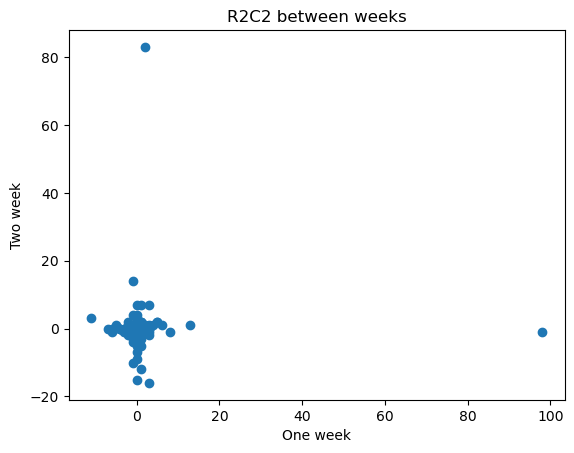

In [57]:
x = [one_wk['ratio R2C2']]
y = [two_wk['ratio R2C2']]
plt.xlabel('One week')
plt.ylabel('Two week')
plt.title('R2C2 between weeks')
plt.scatter(x,y)


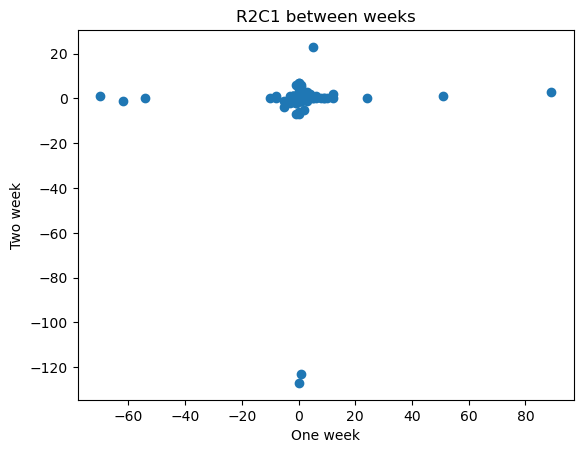

In [58]:
x = [one_wk['ratio R2C1']]
y = [two_wk['ratio R2C1']]
plt.xlabel('One week')
plt.ylabel('Two week')
plt.title('R2C1 between weeks')
plt.scatter(x,y)
